h =  0.01


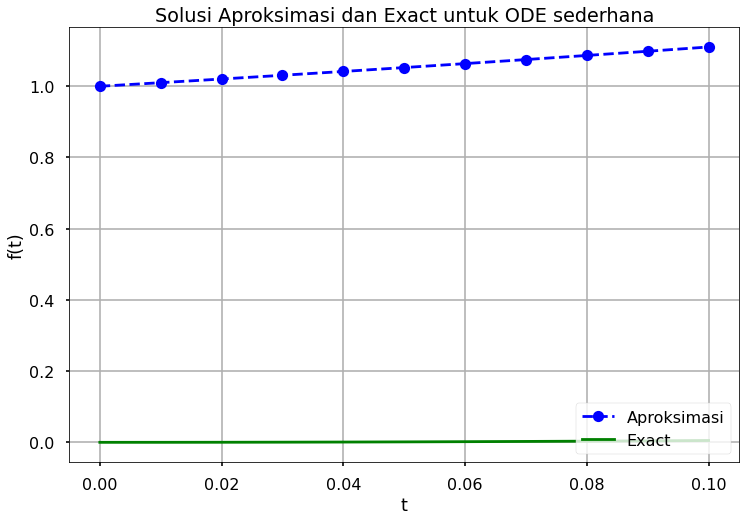

ya = 1.1103381797700187
ys = 0.005170918075647624
galat relatif absolut =  21372.74746043924 %


In [7]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-poster')
%matplotlib inline

# Definisi parameter
f = lambda t, s: t + s # ODE

# Metode Heun 
def heun(f,x0,y0,xn,n):
  h = (xn-x0)/n # ukuran langkah 
  print('h = ', h)
  t = np.arange(x0, xn + h, h) # grid Numerik
  s0 = y0 # kondisi awal
  
  # Metode heun
  s = np.zeros(len(t))
  s[0] = s0
  for i in range(0, len(t) - 1):
    k1 = h*f(t[i], s[i])
    k2 = h*f(t[i]+h, s[i]+k1)
    s[i+1] = s[i] + 0.5*(k1+k2)
    t[i+1] = t[i] + h
  return t, s

x0 = 0
y0 = 1
xn = 0.1
n  = 10 # n = (xn-x0)/h
 
# Menampilkan grafik
t,s = heun(f,x0,y0,xn,n)
plt.figure(figsize = (12, 8))
plt.plot(t, s, 'bo--', label='Aproksimasi')
plt.plot(t, np.exp(t) - t - 1, 'g', label='Exact')
plt.title('Solusi Aproksimasi dan Exact untuk ODE sederhana')
plt.xlabel('t')
plt.ylabel('f(t)')
plt.grid()
plt.legend(loc='lower right')
plt.show()

# Perhitungan galat
sol_heun = s[10]
sol_exact = np.exp(0.1) - 0.1 - 1
galat_ra = abs((sol_exact-sol_heun)/sol_exact)*100

print('ya =',sol_heun)
print('ys =',sol_exact)
print('galat relatif absolut = ', galat_ra,'%')